**Sales store analysis**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Salesstore.csv to Salesstore.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# load the data
data = pd.read_csv('Salesstore.csv')

# Display the data
data.head(2)
data.tail(2)



,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
728,1826,Not Specified,5,28.32,Regular Air,-14.35,Susan Vittorini,Ontario,Corporate,Office Supplies,Paper,Hammermill CopyPlus Copy Paper (20Lb. and 84 B...,Small Box
729,20003,Medium,39,796.08,Regular Air,30.29,Shirley Schmidt,Ontario,Corporate,Technology,Computer Peripherals,Belkin 105-Key Black Keyboard,Small Box


In [ ]:
# Data Exploration
# Check the shape of the data
data_shape=data.shape
print('data shape:',data_shape)

data shape: (730, 13)


In [ ]:
# Check the data types
dt=data.dtypes
print('checking the datatype:',dt)

checking the datatype: Order_ID                  int64
Order_Priority           object
Order_Quantity            int64
Sales                   float64
Ship_Mode                object
Profit                  float64
Customer_Name            object
Region                   object
Customer_Segment         object
Product_Category         object
Product_Sub-Category     object
Product_Name             object
Product_Container        object
dtype: object


In [ ]:
# Check for missing values
mv=data.isnull().sum()
print('missing values;==',mv)

missing values;== Order_ID                0
Order_Priority          0
Order_Quantity          0
Sales                   0
Ship_Mode               0
Profit                  0
Customer_Name           0
Region                  0
Customer_Segment        0
Product_Category        0
Product_Sub-Category    0
Product_Name            0
Product_Container       0
dtype: int64


In [ ]:
# Check for duplicate values
dv=data.duplicated().sum()
print('to know the duplicate values:==',dv)

to know the duplicate values:== 0


In [ ]:
# Discribe the dataset
print('Discribe the table :====',data.describe())

Discribe the table :====            Order_ID  Order_Quantity         Sales       Profit
count    730.000000      730.000000    730.000000   730.000000
mean   29721.597260       24.857534   1502.777653   207.479233
std    17350.560439       14.182970   2893.936648   878.631028
min       35.000000        1.000000      8.600000 -4437.910000
25%    14479.000000       13.000000    171.098375   -77.132500
50%    29350.500000       25.000000    438.700000     0.035000
75%    44978.500000       37.000000   1480.855000   180.000000
max    59909.000000       50.000000  27663.920000  8417.570000


In [ ]:
# Check the columns
print('columns:',data.columns)

columns: Index(['Order_ID', 'Order_Priority', 'Order_Quantity', 'Sales', 'Ship_Mode',
       'Profit', 'Customer_Name', 'Region', 'Customer_Segment',
       'Product_Category', 'Product_Sub-Category', 'Product_Name',
       'Product_Container'],
      dtype='object')


In [ ]:
# 1. Most selling Product_category
most_selling_p=data['Product_Category'].value_counts().idxmax()
print(most_selling_p)

Office Supplies


In [ ]:
# 2. Which product_category given more profits
cat_profit=data.groupby('Product_Category')['Profit'].sum()
print(cat_profit)

Product_Category
Furniture          17017.84
Office Supplies    53073.95
Technology         81368.05
Name: Profit, dtype: float64


In [ ]:
# 3. which segment peoples buying the goods
cust_profit=data.groupby('Customer_Segment')['Profit'].sum()
print(cust_profit)

Customer_Segment
Consumer           18641.47
Corporate         120106.44
Home Office        11619.34
Small Business      1092.59
Name: Profit, dtype: float64


In [ ]:
# 4. Which region peoples are purchase more times
rig_sales=data.groupby('Region')['Sales'].sum()
print(rig_sales)

Region
Atlantic                 271205.1010
Northwest Territories    275140.7555
Nunavut                   36306.4980
Ontario                   81727.7725
Prarie                    86646.1360
West                     346001.4240
Name: Sales, dtype: float64


In [ ]:
# 5. Know the Product_category and its Oredr_quantity
cust_cat=data.groupby('Product_Category')['Order_Quantity'].sum()
print(cust_cat)

Product_Category
Furniture           2494
Office Supplies    10925
Technology          4727
Name: Order_Quantity, dtype: int64


In [ ]:
# 6. To know the total sales of Product_category and Profit
total_profit=data.groupby(['Sales','Product_Category'])['Profit'].sum()
print(total_profit)

Sales     Product_Category
8.60      Office Supplies       -2.03
12.74     Furniture            -11.39
13.30     Office Supplies       -7.86
14.23     Furniture             -4.43
14.68     Office Supplies      -13.78
                               ...   
19417.55  Office Supplies     8417.57
20872.16  Technology         -4437.91
22079.47  Technology          5322.14
23255.61  Technology          -734.33
27663.92  Technology          -391.92
Name: Profit, Length: 730, dtype: float64


**DATA VISUALIZATION**

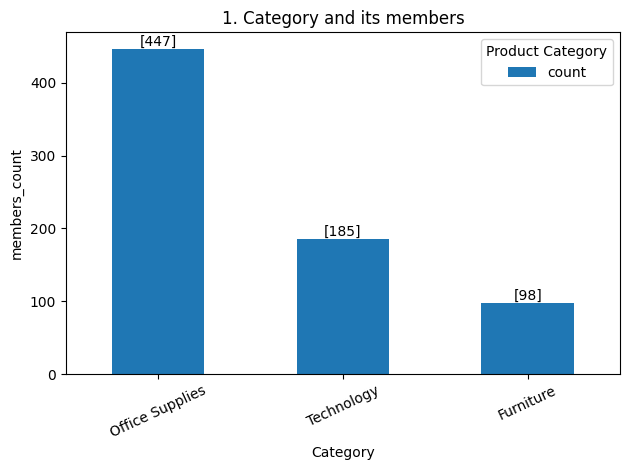

In [ ]:
# Most selling Product_category
most_selling_p=data['Product_Category'].value_counts()
df=pd.DataFrame(most_selling_p)
ax=df.plot(kind='bar')
# 1. Customizing the plot
plt.title("1. Category and its members")
plt.xlabel("Category")
plt.ylabel("members_count")
plt.xticks(rotation=25)
plt.legend(title="Product Category")
# Adding profit value labels on the bars
for i, value in enumerate(df.values):
    ax.text(i, value + 0.2, str(value), ha='center', va='bottom', fontsize=10)
# Show plot
plt.tight_layout()
plt.show()

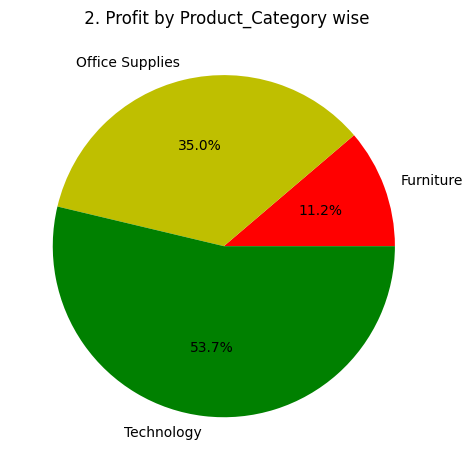

In [55]:
# 2. Which product_category given more profits
cat_profit=data.groupby('Product_Category')['Profit'].sum()
df=pd.DataFrame(cat_profit)
c='r','y','g'
plt.pie(df['Profit'],labels=df.index,colors=c,autopct='%1.1f%%')
# Customizing the plot
plt.title(" 2. Profit by Product_Category wise")
plt.xticks(rotation=25)
# Show plot
plt.tight_layout()
plt.show()

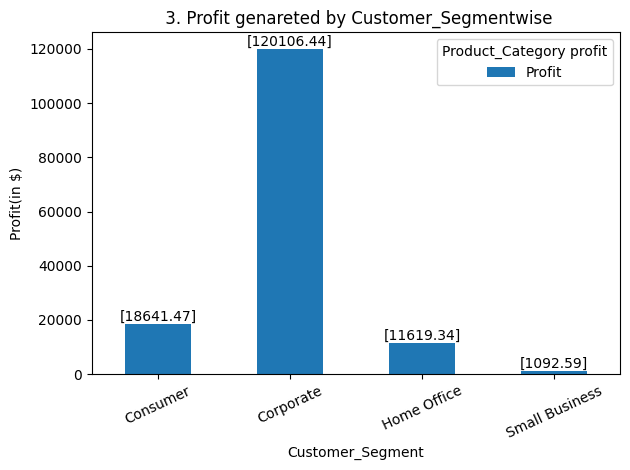

In [ ]:
#3. which segment peoples buying the goods
cust_profit=data.groupby('Customer_Segment')['Profit'].sum()
df=pd.DataFrame(cust_profit)

ax=df.plot(kind='bar')
# Customizing the plot
plt.title(" 3. Profit genareted by Customer_Segmentwise")
plt.xlabel("Customer_Segment")
plt.ylabel("Profit(in $)")
plt.xticks(rotation=25)
plt.legend(title="Product_Category profit")
# Adding profit value labels on the bars
for i, value in enumerate(df.values):
    ax.text(i, value + 0.2, str(value), ha='center', va='bottom', fontsize=10)
# Show plot
plt.tight_layout()
plt.show()

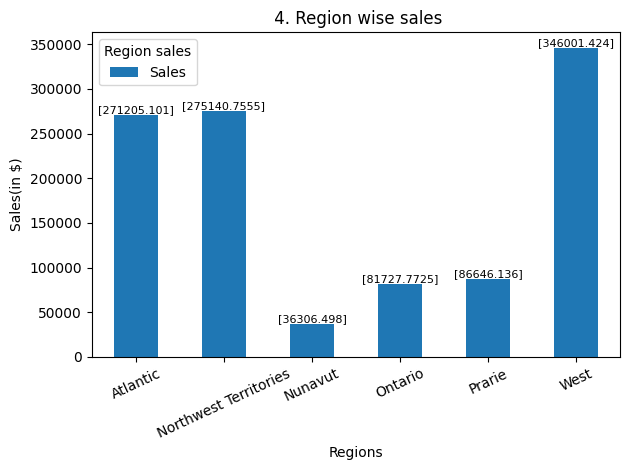

In [ ]:
# 4. Which region peoples are purchase more times
rig_sales=data.groupby('Region')['Sales'].sum()
df=pd.DataFrame(rig_sales)
ax=df.plot(kind='bar')
# Customizing the plot
plt.title(" 4. Region wise sales")
plt.xlabel("Regions")
plt.ylabel("Sales(in $)")
plt.xticks(rotation=25)
plt.legend(title="Region sales")
# Adding profit value labels on the bars
for i, value in enumerate(df.values):
    ax.text(i, value + 0.2, str(value), ha='center', va='bottom', fontsize=8)
# Show plot
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

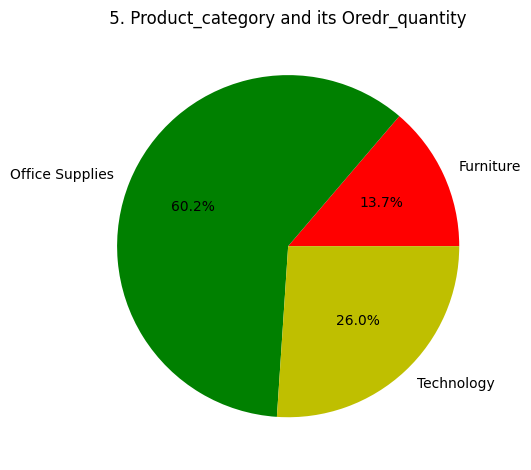

In [56]:
#5. Know the Product_category and its Oredr_quantity
cust_cat=data.groupby('Product_Category')['Order_Quantity'].sum()
df=pd.DataFrame(cust_cat)
c='r','g','y'
plt.pie(df['Order_Quantity'],labels=df.index,colors=c,autopct='%1.1f%%')
# Customizing the plot
plt.title(" 5. Product_category and its Oredr_quantity ")
plt.xticks(rotation=25)

# Adding profit value labels on the bars
for i, value in enumerate(df.values):
    ax.text(i, value + 0.2, str(value), ha='center', va='bottom', fontsize=8)
# Show plot
plt.tight_layout()
plt.show()

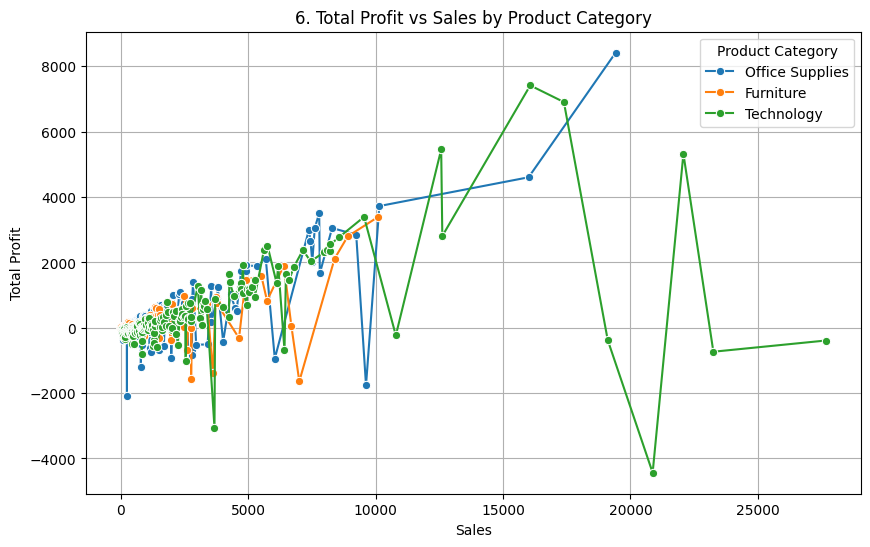

In [ ]:
# 6. To know the total sales of Product_category and Profit

# Reset index to turn groupby result into a DataFrame
total_profit = data.groupby(['Sales','Product_Category'])['Profit'].sum().reset_index()

# Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Sales', y='Profit', hue='Product_Category', marker='o', data=total_profit)

plt.title('6. Total Profit vs Sales by Product Category')
plt.xlabel('Sales')
plt.ylabel('Total Profit')
plt.legend(title='Product Category')
plt.grid(True)
plt.show()